In [1]:
%matplotlib inline
import matplotlib.pyplot as plt
import pandas as pd
from pandas.tools.plotting import scatter_matrix

In [28]:
R200_offsets = [key for key in df.keys() if "R200" in key]

In [29]:
offsets = df.keys() - R200_offsets

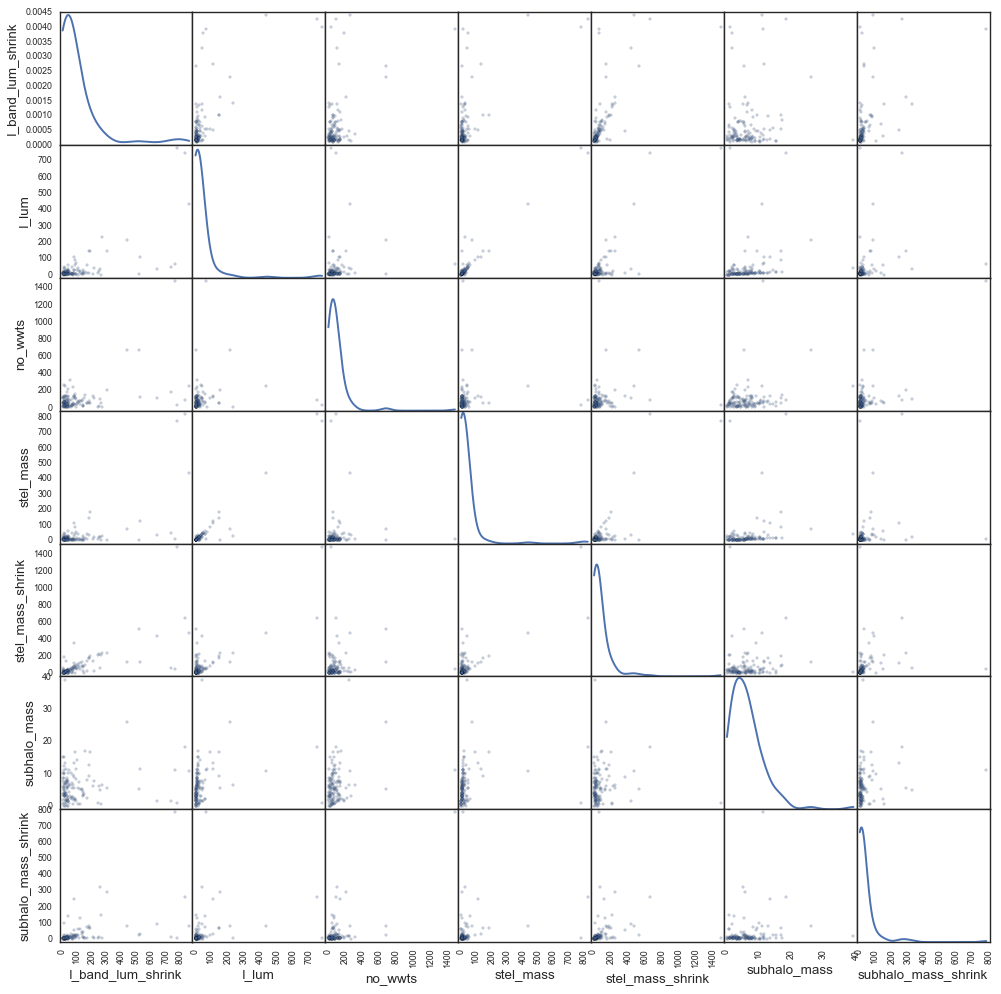

In [30]:
axArray = scatter_matrix(df[offsets], diagonal='kde', alpha=0.3,
                        figsize=(15, 15))


# for illustration purposes only, 
# the axis arange varies from mosaic to mosaic 
# which makes it hard for comparison
for axTemp in axArray:
    for ax in axTemp: 
        for item in ([ax.title, ax.xaxis.label, ax.yaxis.label]): 
            item.set_fontsize(12)
        for item in (ax.get_xticklabels() + ax.get_yticklabels()):
            item.set_fontsize(8)

In [45]:
df.describe()

,I_lum,R200_I_lum,subhalo_mass,R200_subhalo_mass,stel_mass,R200_stel_mass,subhalo_mass_shrink,stel_mass_shrink,I_band_lum_shrink,no_wwts,R200_no_wwts
count,129.000000,129.000000,129.000000,129.000000,129.000000,129.000000,129.000000,129.000000,129.000000,129.000000,129.000000
mean,37.281424,0.107912,6.244648,0.015942,33.074001,0.092624,32.421342,79.423637,105.185105,93.588492,0.249271
std,104.835767,0.319810,5.366485,0.014556,106.514465,0.323545,85.425490,161.551849,173.942993,155.389777,0.427926
min,0.027215,0.000043,0.019764,0.000039,0.027215,0.000043,0.050713,1.419611,0.106954,1.752930,0.003495
25%,4.118358,0.011613,2.488282,0.005864,4.089556,0.011364,3.702154,13.947211,15.236450,27.584135,0.063680
50%,9.941563,0.022478,5.438129,0.013537,8.891282,0.021102,7.863965,29.426165,36.758398,58.804352,0.141601
75%,22.080221,0.062774,8.084752,0.020460,21.153036,0.050681,21.448790,74.558264,105.624491,107.548730,0.293187
max,775.495415,2.631515,39.114404,0.095803,818.878445,2.897078,782.844077,1481.561506,856.815910,1475.248483,3.673592


In [31]:
import seaborn as sns
sns.set_style("white")

In [38]:
df.keys()

Index([u'I_lum', u'R200_I_lum', u'subhalo_mass', u'R200_subhalo_mass', u'stel_mass', u'R200_stel_mass', u'subhalo_mass_shrink', u'stel_mass_shrink', u'I_band_lum_shrink', u'no_wwts', u'R200_no_wwts'], dtype='object')

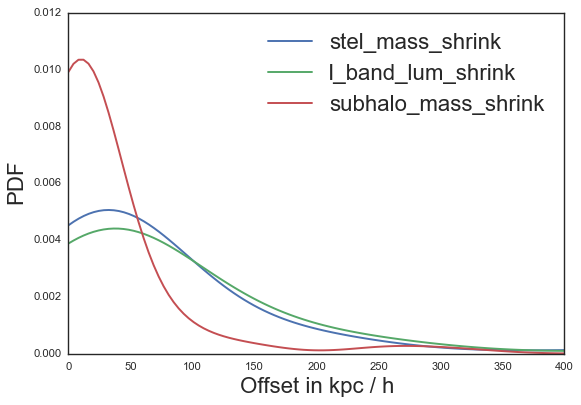

In [43]:
for k in ["stel_mass_shrink", "I_band_lum_shrink", "subhalo_mass_shrink"]:
    sns.kdeplot(df[k], clip=(0, 400))
    for item in (ax.get_xticklabels() + ax.get_yticklabels()):
        item.set_fontsize(15)
plt.xlabel("Offset in kpc / h", fontsize=20)
plt.ylabel("PDF", fontsize=20)
plt.legend(loc='best', frameon=False, fontsize=20)
ylim = plt.ylim()

(0.0, 0.012)

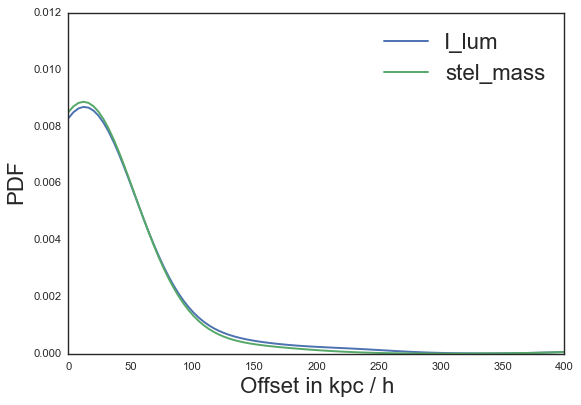

In [44]:
for k in ["I_lum", "stel_mass"]:
    sns.kdeplot(df[k], clip=(0, 400))
    for item in (ax.get_xticklabels() + ax.get_yticklabels()):
        item.set_fontsize(15)
plt.xlabel("Offset in kpc / h", fontsize=20)
plt.ylabel("PDF", fontsize=20)
plt.legend(loc='best', frameon=False, fontsize=20)
plt.ylim(ylim)

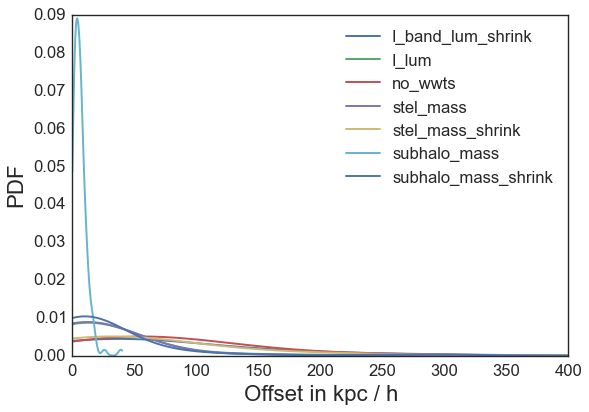

In [36]:
plt.xlabel("Offset in kpc / h", fontsize=20)
plt.ylabel("PDF", fontsize=20)
ax = plt.subplot(111)
for k in offsets:
    sns.kdeplot(df[k], clip=(0, 400))
    for item in (ax.get_xticklabels() + ax.get_yticklabels()):
        item.set_fontsize(15)
        
plt.legend(loc='best', fontsize=15)
    


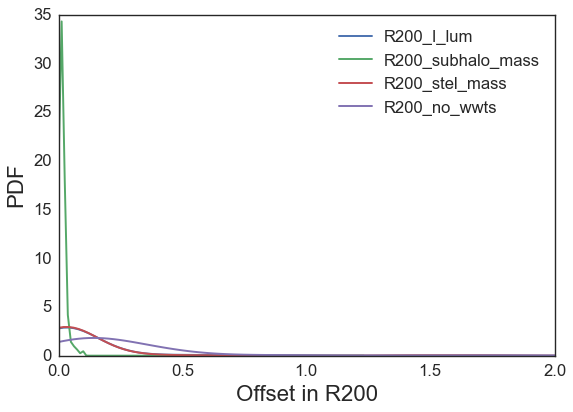

In [37]:
plt.xlabel("Offset in R200", fontsize=20)
plt.ylabel("PDF", fontsize=20)
ax = plt.subplot(111)
for k in R200_offsets:
    sns.kdeplot(df[k], clip=(0, 2))
    for item in (ax.get_xticklabels() + ax.get_yticklabels()):
        item.set_fontsize(15)
    
plt.legend(loc='best', fontsize=15)